### Найпростіший підхід називається Bag of Words: створюємо вектор довжиною в словник, для кожного слова вважаємо кількість входжень в текст і підставляємо це число на відповідну позицію в векторі.
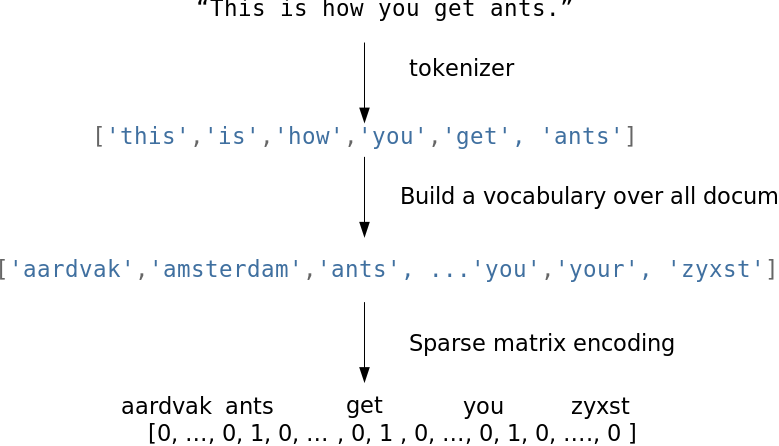

In [13]:
from functools import reduce
import numpy as np

In [14]:
texts = [['i', 'have', 'a', 'cat'],
         ['he', 'have', 'a', 'dog'],
         ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]

In [15]:
dictionary = list(enumerate(set(reduce(lambda x, y: x+y, texts))))
dictionary

[(0, 'he'),
 (1, 'cat'),
 (2, 'i'),
 (3, 'a'),
 (4, 'dog'),
 (5, 'have'),
 (6, 'and')]

In [16]:
def vectorize(text):
    vector = np.zeros(len(dictionary))
    for i, word in dictionary:
        num = 0
        for w in text:
            if w == word:
                num+=1
        if num:
            vector[i] = num
    return vector

In [17]:
for t in texts:
    print(vectorize(t))

[0. 1. 1. 1. 0. 1. 0.]
[1. 0. 0. 1. 1. 1. 0.]
[1. 1. 1. 2. 1. 1. 2.]


### Використовуючи алгоритми начебто Вag of Words, ми втрачаємо порядок слів у тексті, а значить, тексти "i have no cows" і "no, i have cows" будуть ідентичними після векторизації, хоча і протилежними семантично. Щоб уникнути цієї проблеми, можна зробити крок назад і змінити підхід до токенізаціі: наприклад, використовувати N-грами (комбінації з N послідовних термінів).

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vect = CountVectorizer(ngram_range = (1,1))

In [20]:
vect.fit_transform(['no i have a cows', 'i have no cows']).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [21]:
vect.vocabulary_

{'no': 2, 'have': 1, 'cows': 0}

In [22]:
vect_1 = CountVectorizer(ngram_range = (1,2))

In [23]:
vect_1.fit_transform(['no i have a cows', 'i have no cows']).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]], dtype=int64)

In [24]:
vect_1.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

Розвиток ідеї Bag of Words: слова, які рідко зустрічаються в корпусі (у всіх розглянутих документах цього набору даних), але присутні в цьому конкретному документі, можуть виявитися більш важливими. Тоді має сенс підвищити вагу більш вузькотематичні словами, щоб відокремити їх від загальнотематичних. Цей підхід називається TF-IDF, його вже не напишеш в десять рядків, тому бажаючі можуть ознайомитися з деталями в зовнішніх джерелах начебто wiki . Варіант за замовчуванням виглядає так:
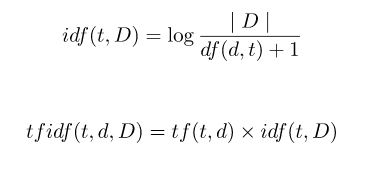